In [21]:
import pandas as pd
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras

In [22]:
train_data=sio.loadmat('../input/svhndataset/extra_32x32.mat')
test_data=sio.loadmat('../input/svhndataset/test_32x32.mat')

In [23]:
X_train, y_train=train_data['X'],train_data['y']
X_test, y_test=test_data['X'],test_data['y']

In [24]:
# 10 class uisng for number '0'
np.unique(y_train)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=uint8)

In [25]:
X_train.shape

(32, 32, 3, 531131)

In [26]:
# for calling one image need traspose data
X_train=X_train.transpose((3,0,1,2))
X_test=X_test.transpose((3,0,1,2))

/opt/conda/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


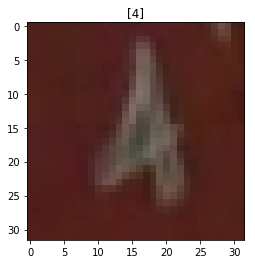

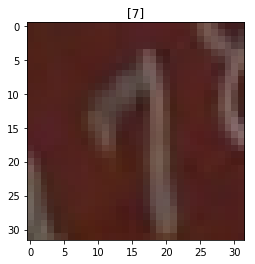

In [27]:
for i in range(2):
    plt.subplots()
    plt.imshow(X_train[i])
    plt.title(y_train[i])

In [28]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(filters = 3,
                        kernel_size=(3,3),
                        input_shape = (X_train[0].shape[0], X_train[0].shape[1], X_train[0].shape[2]),
                        activation='relu',
                        padding='same'))

model.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(256,activation='relu'))


model.add(keras.layers.Dense(256,activation='relu'))

model.add(keras.layers.Dense(256,activation='relu'))

model.add(keras.layers.Dense(11, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 3)         84        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 3)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 768)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 768)               3072      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               196864    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)              

In [30]:
y_train.shape

(531131, 1)

In [31]:
#One hot encoder
from keras.utils import np_utils
y_train_labels = np_utils.to_categorical(y_train)

In [32]:
model.fit(X_train, y_train_labels, batch_size=128, epochs=5, validation_split=0.2)

Train on 424904 samples, validate on 106227 samples
Epoch 1/5
424904/424904 [==============================] - 31s 73us/sample - loss: 0.4033 - acc: 0.8746 - val_loss: 0.2247 - val_acc: 0.9327
Epoch 2/5
424904/424904 [==============================] - 30s 70us/sample - loss: 0.2151 - acc: 0.9356 - val_loss: 0.1869 - val_acc: 0.9447
Epoch 3/5
424904/424904 [==============================] - 30s 70us/sample - loss: 0.1742 - acc: 0.9482 - val_loss: 0.1808 - val_acc: 0.9484
Epoch 4/5
424904/424904 [==============================] - 30s 71us/sample - loss: 0.1511 - acc: 0.9549 - val_loss: 0.1640 - val_acc: 0.9525
Epoch 5/5
424904/424904 [==============================] - 29s 69us/sample - loss: 0.1357 - acc: 0.9595 - val_loss: 0.1525 - val_acc: 0.9573


In [33]:
y_pred=model.predict_classes(X_test)

In [34]:
#Accuracy for CNN model - first variant
accuracy_score(y_test,y_pred)

0.9030039950829748

In [35]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model

In [36]:
# Use architect from ResNet50
base_model = ResNet50(include_top = False,
                   weights = 'imagenet',
                   input_shape = (32, 32, 3))

/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [37]:
# Dont fix layers for training
for layer in base_model.layers:
    layer.trainable = True 

In [38]:
x = base_model.layers[-2].output

x = keras.layers.Flatten()(x)

x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation='relu')(x)

x = keras.layers.Dense(11, activation='softmax')(x)

model2 = Model(inputs=base_model.input, outputs=x)

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [40]:
model2.fit(X_train, y_train_labels, batch_size=300, epochs=10, validation_split=0.2)

Train on 424904 samples, validate on 106227 samples
Epoch 1/10
424904/424904 [==============================] - 175s 412us/sample - loss: 0.3052 - acc: 0.9142 - val_loss: 0.1620 - val_acc: 0.9524
Epoch 2/10
424904/424904 [==============================] - 167s 393us/sample - loss: 0.1498 - acc: 0.9583 - val_loss: 0.0986 - val_acc: 0.9712
Epoch 3/10
424904/424904 [==============================] - 167s 393us/sample - loss: 0.1544 - acc: 0.9563 - val_loss: 0.1118 - val_acc: 0.9680
Epoch 4/10
424904/424904 [==============================] - 167s 393us/sample - loss: 0.1035 - acc: 0.9711 - val_loss: 0.2746 - val_acc: 0.9180
Epoch 5/10
424904/424904 [==============================] - 168s 394us/sample - loss: 0.0845 - acc: 0.9761 - val_loss: 0.0967 - val_acc: 0.9726
Epoch 6/10
424904/424904 [==============================] - 166s 390us/sample - loss: 0.0666 - acc: 0.9815 - val_loss: 0.0989 - val_acc: 0.9717
Epoch 7/10
424904/424904 [==============================] - 167s 392us/sample - loss

In [41]:
#Accuracy for CNN model - second variant. With structure ResNet50
y_pred2=model2.predict(X_test)


In [42]:
#Convert prediction to classes
y_pred2_cls=[]
for i in range(y_pred2.shape[0]):
    y_pred2_cls.append(np.argmax(y_pred2[i]))

In [43]:
accuracy_score(y_test,y_pred2_cls)

0.9473340503995082

Точность на валидационной выборке составила ~98%, на тестовых данных составило ~95%. Для улучшения качества модели можно воспользоваться следующим:

    1) Увеличение кол-ва train данных с помощью аугментации существующих данных.    
    2) Так как с увеличением эпох уменьшается loss на валидционной выборке, то увеличение кол-ва эпох может увеличить точность. 
    3) Возможно поможет предварительная предобработка данных, к примеру, поиск дескрипторов в изображениях.
    4) Воспользоваться беггингом - метод ансамблирования моделей.

Каждый из приведенных пунктов увеличивает время предобратки данных, а так же время обучения. 

Predict value =  5     True value = [5]
Predict value =  2     True value = [2]
Predict value =  1     True value = [1]


/opt/conda/lib/python3.6/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


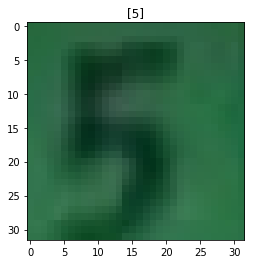

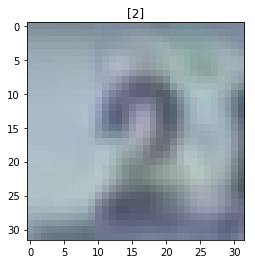

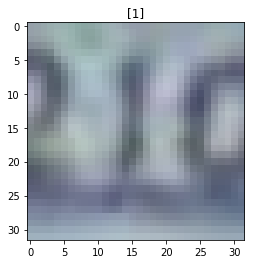

In [44]:
for i in range(3):
    print('Predict value = ',y_pred2_cls[i],"    True value =",y_test[i] )
    plt.subplots()
    plt.imshow(X_test[i])
    plt.title(y_test[i])    